In [885]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

%matplotlib inline

## Loading Data

In [886]:
train = pd.read_csv('train_1.csv')
test = pd.read_csv('test_1.csv')
temp = train.loc[:,["Platform","Year_of_Release","Genre","Publisher","Critic_Score","Critic_Count","User_Score","User_Count"]]
temp

,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count
0,PS3,2012,Role-Playing,Namco Bandai Games,71,59,7.9,216
1,PS2,2002,Role-Playing,Atari,75,35,8.5,60
2,PS2,2002,Role-Playing,Atari,76,24,8.9,81
3,PS2,2002,Role-Playing,Atari,70,23,8.7,19
4,PC,2012,Action,Activision,76,12,6.4,389
...,...,...,...,...,...,...,...,...
6199,PS3,2007,Shooter,Ubisoft,86,32,7.6,81
6200,PC,2008,Shooter,Ubisoft,78,20,7.3,185
6201,X360,2008,Shooter,Ubisoft,82,66,7.8,176
6202,PS3,2008,Shooter,Ubisoft,81,32,7.9,93


### Preprocessing

For data preprocessing, we used one-hot encoding.

In [226]:
Genre = temp.loc[:,["Genre"]]
Genre

,Genre
0,Role-Playing
1,Role-Playing
2,Role-Playing
3,Role-Playing
4,Action
...,...
6199,Shooter
6200,Shooter
6201,Shooter
6202,Shooter


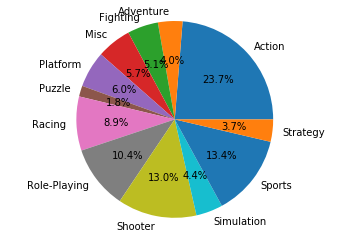

In [887]:
labels = train['Genre'].astype('category').cat.categories.tolist()
counts = train['Genre'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.show()

In [888]:
pd.get_dummies(Genre, columns=['Genre'], prefix = ['Genre'])

,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6199,0,0,0,0,0,0,0,0,1,0,0,0
6200,0,0,0,0,0,0,0,0,1,0,0,0
6201,0,0,0,0,0,0,0,0,1,0,0,0
6202,0,0,0,0,0,0,0,0,1,0,0,0


In [857]:
X = temp.copy()
X = pd.get_dummies(X, columns=['Genre'], prefix = ['Genre'])
X = pd.get_dummies(X, columns=['Year_of_Release'], prefix = ['Year_of_Release'])
X = pd.get_dummies(X, columns=['Platform'], prefix = ['Platform'])
X = pd.get_dummies(X, columns=['Publisher'], prefix = ['Publisher'])
X.fillna(0)
X

,Critic_Score,Critic_Count,User_Score,User_Count,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,...,Publisher_XS Games,Publisher_Xicat Interactive,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software
0,71,59,7.9,216,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,75,35,8.5,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,76,24,8.9,81,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,70,23,8.7,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,76,12,6.4,389,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6199,86,32,7.6,81,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6200,78,20,7.3,185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6201,82,66,7.8,176,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6202,81,32,7.9,93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [874]:
# Load the modified data
x_train,x_cv,y_train,y_cv = train_test_split(X,train.Global_Sales,test_size = 0.3)

## Perform Linear Reression

In [889]:
def rmse(pred, test): 
    rmse = 0.0
    N = test.shape[0]
    for i in range(N):
        rmse += (pred[i] - test[i]) * (pred[i] - test[i])
    rmse = rmse / len(pred)
    rmse = math.sqrt(rmse)
    return rmse

In [890]:
# Do linear regression for x_train and y_train
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(x_train,y_train)
lr_pred = lin_reg.predict(x_cv)
lr_rmse = rmse(np.asarray(lr_pred),np.asarray(y_cv))
lr_score = lin_reg.score(x_cv,y_cv)

print("Linear Regression detail:")
print("RMSE: %s" % lr_rmse)
print("R^2 score: %f" % lr_score)

Linear Regression detail:
RMSE: 1.2723333896264803
R^2 score: 0.349744


## Perform Ridge Regression


In [891]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

alphas = [0.1, 1, 10, 50, 100, 1e-3, 1e-4, 2e-4, 5e-4, 8e-4, 1e-5, 1e-6, 1e-7, 1e-8]

rid_reg = RidgeCV(alphas=alphas,store_cv_values=True)

rid_reg.fit(x_train,y_train)

rr_pred = rid_reg.predict(x_cv)

rr_rmse = rmse(np.asarray(rr_pred),np.asarray(y_cv))

rr_score = rid_reg.score(x_cv,y_cv)

print("Ridge Regression detail:")
print("alphas: %s" % alphas)
print("RMSE: %s" % rr_rmse)
print("Best alpha after CV: %f" % rid_reg.alpha_)
print("R^2 score: %f" % rr_score)

Ridge Regression detail:
alphas: [0.1, 1, 10, 50, 100, 0.001, 0.0001, 0.0002, 0.0005, 0.0008, 1e-05, 1e-06, 1e-07, 1e-08]
RMSE: 1.267450229079295
Best alpha after CV: 10.000000
R^2 score: 0.354726


## Perform Lasso Regression

In [892]:
from sklearn.linear_model import LassoCV

alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

lasso = LassoCV(alphas=alphas,max_iter=50000, cv=10)
lasso.fit(x_train,y_train)

lasso_pred = lasso.predict(x_cv)

lasso_rmse = rmse(np.asarray(lasso_pred),np.asarray(y_cv))

lasso_score = lasso.score(x_cv,y_cv)

print("Lasso Regression detail:")
print("alphas: %s" % alphas)
print("RMSE: %s" % lasso_rmse)
print("Best alpha after CV: %f" % lasso.alpha_)
print("R^2 score: %f" % lasso_score)

Lasso Regression detail:
alphas: [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
RMSE: 1.269339787175387
Best alpha after CV: 0.000600
R^2 score: 0.352800


## Perform Elastic Net Regression

In [893]:
from sklearn.linear_model import ElasticNetCV

l1_ratios=[0.01, 0.05, 0.1, 0.2, 0.5, 0.9, .99, 1]

en_reg = ElasticNetCV(l1_ratio=l1_ratios, n_jobs=9, cv = 10, max_iter=50000)

en_reg.fit(x_train,y_train)

en_pred = en_reg.predict(x_cv)

en_rmse = rmse(np.asarray(en_pred),np.asarray(y_cv))

en_score = en_reg.score(x_cv,y_cv)


print("Elastic Net Regression detail:")
print("l1_ratios: %s" % l1_ratios)
print("RMSE: %s" % en_rmse)
print("Best alpha after CV: %f" % en_reg.alpha_)
print("Best l1 ratio after CV: %f" % en_reg.l1_ratio_)
print("R^2 score: %f" % en_score)


Elastic Net Regression detail:
l1_ratios: [0.01, 0.05, 0.1, 0.2, 0.5, 0.9, 0.99, 1]
RMSE: 1.3677022240620456
Best alpha after CV: 0.245314
Best l1 ratio after CV: 1.000000
R^2 score: 0.248610


## Result Comparison


In [894]:
data = [["Linear Regression",lr_rmse,lr_score]
        ,["Ridge Regression",rr_rmse,rr_score]
        ,["Lasso Regression",lasso_rmse,lasso_score]
        ,["Elastic Net Regression",en_rmse,en_score]]
df = pd.DataFrame(data, columns=['Model', 'RMSE', 'R^2 score'])
df

,Model,RMSE,R^2 score
0,Linear Regression,1.272333,0.349744
1,Ridge Regression,1.267450,0.354726
2,Lasso Regression,1.269340,0.352800
3,Elastic Net Regression,1.367702,0.248610


## Conclusion

Ridge Regression is the optimal model for this dataset since it has least RMSE and largest R^2 score